In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from sklearn.model_selection import train_test_split

In [210]:
np.random.seed(100)
random_data = np.random.rand(800, 10)
print(random_data.shape)

(800, 10)


In [211]:
xor_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]], dtype='float64')
repeat_data = np.tile(xor_data, (200, 1))
y_label = repeat_data[:, -1]
raw_data = np.delete(repeat_data, -1, 1)
noise_data = np.random.normal(raw_data)
print(repeat_data.shape)
print(raw_data.shape)
print(noise_data.shape)
print(y_label.shape)

(800, 3)
(800, 2)
(800, 2)
(800,)


In [212]:
data = np.concatenate((raw_data, random_data), axis=1)
print(data.shape)

(800, 12)


In [186]:
# Define layers for AutoEncoder
encoding_dim = 3
input_dim = Input(shape=(12,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_dim)
decoded = Dense(12, activation='sigmoid')(encoded)
# This is the model for an AutoEncoder
autoencoder = Model(input_dim, decoded)

# Create encoder and decoder
encoder = Model(input_dim, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [187]:
# Compile the model
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
autoencoder.compile(optimizer=sgd, loss='mean_squared_error')

In [188]:
# Work with dataset
x_train, x_test, y_train, y_test = train_test_split(data, y_label, test_size=0.2)
autoencoder.fit(x_train, x_train,
               epochs=40,
               batch_size=5,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 640 samples, validate on 160 samples
Epoch 1/40
640/640 [==============================] - 1s - loss: 0.1114 - val_loss: 0.1089
Epoch 2/40
640/640 [==============================] - 0s - loss: 0.1090 - val_loss: 0.1072
Epoch 3/40
640/640 [==============================] - 0s - loss: 0.1071 - val_loss: 0.1050
Epoch 4/40
640/640 [==============================] - 0s - loss: 0.1048 - val_loss: 0.1023
Epoch 5/40
640/640 [==============================] - 0s - loss: 0.1020 - val_loss: 0.0992
Epoch 6/40
640/640 [==============================] - 0s - loss: 0.0987 - val_loss: 0.0958
Epoch 7/40
640/640 [==============================] - 0s - loss: 0.0952 - val_loss: 0.0924
Epoch 8/40
640/640 [==============================] - 0s - loss: 0.0918 - val_loss: 0.0893
Epoch 9/40
640/640 [==============================] - 0s - loss: 0.0888 - val_loss: 0.0864
Epoch 10/40
640/640 [==============================] - 0s - loss: 0.0859 - val_loss: 0.0839
Epoch 11/40
640/640 [======================

(160, 12)
(160, 3)


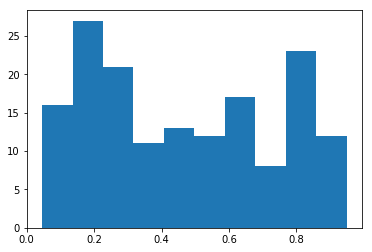

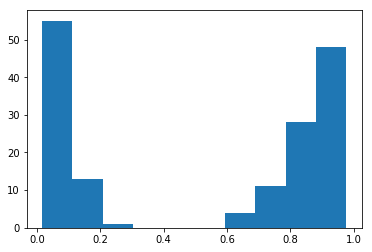

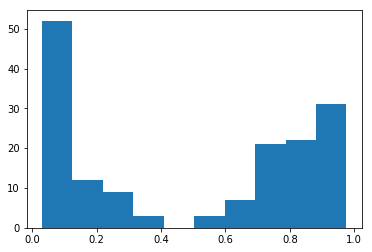

In [191]:
encoded_vectors = encoder.predict(x_test)
decoded_vectors = decoder.predict(encoded_vectors)
print(x_test.shape)
print(encoded_vectors.shape)
plt.hist(encoded_vectors[:, 0])
plt.show()
plt.hist(encoded_vectors[:, 1])
plt.show()
plt.hist(encoded_vectors[:, 2])
plt.show()

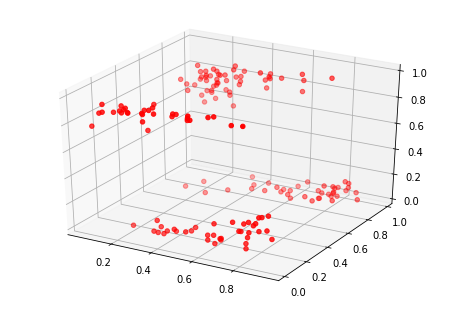

In [193]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(encoded_vectors[:, 0], encoded_vectors[:, 1], encoded_vectors[:, 2], c='r', marker='o')
pyplot.show()


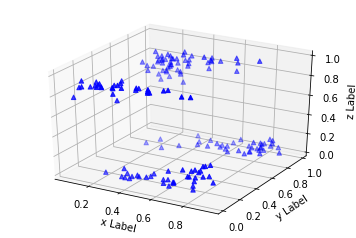

In [196]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(encoded_vectors[:, 0], encoded_vectors[:, 1], encoded_vectors[:, 2], c=c, marker=m)
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')

plt.show()